## Data exploratory analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [5]:
url = r'https://raw.githubusercontent.com/MSI17819/Berlin_bike_theft_prediction/main/Berlin_bike_thief_file_for_analysis.csv'

df = pd.read_csv(url, sep=',', encoding="utf-8")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34424 entries, 0 to 34423
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Record_date              34424 non-null  object
 1   Record_day               34424 non-null  int64 
 2   Record_month             34424 non-null  int64 
 3   Record_year              34424 non-null  int64 
 4   Stealing_date            34424 non-null  object
 5   Stealing_hour            34424 non-null  int64 
 6   Report_stealing_date     34424 non-null  object
 7   Report_stealing_hour     34424 non-null  int64 
 8   Berlin_code_area         34424 non-null  int64 
 9   Bike_value               34424 non-null  int64 
 10  Unsuccesful_attempt      34424 non-null  object
 11  Bike_type                34424 non-null  object
 12  Crime_type               34424 non-null  object
 13  Crime_reason             34424 non-null  object
 14  Administrative_district  34424 non-nul

In [6]:
df

,Record_date,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name
0,2022-09-05,5,9,2022,2022-09-03,6,2022-09-04,11,6300526,790,No,Men,Theft,Aggravated theft,Steglitz-Zehlendorf,Zehlendorf Süd/Lichterfelde West,Teltower Damm,Zehlendorf Mitte
1,2022-09-05,5,9,2022,2022-09-05,10,2022-09-05,10,9100101,1000,No,Mountain,Theft,Aggravated theft,Treptow-Köpenick,Treptow-Köpenick 1,Alt-Treptow,Alt-Treptow
2,2022-09-05,5,9,2022,2022-09-05,11,2022-09-05,12,8100206,240,No,Men,Theft,Aggravated theft,Neukölln,Neukölln,Neuköllner Mitte/Zentrum,Flughafenstraße
3,2022-09-05,5,9,2022,2022-09-05,8,2022-09-05,12,11400929,930,No,Men,Theft,Aggravated theft,Lichtenberg,Lichtenberg Mitte,Neu-Lichtenberg,Weitlingkiez
4,2022-09-05,5,9,2022,2022-09-01,7,2022-09-02,14,9100101,300,No,Men,Theft,Aggravated theft,Treptow-Köpenick,Treptow-Köpenick 1,Alt-Treptow,Alt-Treptow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34419,2021-01-02,2,1,2021,2021-01-02,13,2021-01-02,13,8401243,1700,No,Men,Theft,Aggravated theft,Neukölln,Buckow Nord/Rudow,Rudow,Alt-Rudow
34420,2021-01-01,1,1,2021,2021-01-01,20,2021-01-01,20,2100104,2800,No,Men,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Moritzplatz
34421,2021-01-01,1,1,2021,2021-01-01,5,2021-01-01,8,10400941,2527,No,Bike,Break-in,Aggravated theft from basement/floor,Marzahn-Hellersdorf,Kaulsdorf/Mahlsdorf,Mahlsdorf,Pilgramer Straße
34422,2021-01-01,1,1,2021,2021-01-01,17,2021-01-01,18,8401241,888,No,Bike,Theft,Theft,Neukölln,Buckow Nord/Rudow,Rudow,Blumenviertel


#### Creat DataFrame copy for next visualisation and ML analysis steps. Original DataFrame is saved as good practise.

In [7]:
df_copy = df.copy()

#### Display DataFrame copy

In [8]:
df_copy

,Record_date,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name
0,2022-09-05,5,9,2022,2022-09-03,6,2022-09-04,11,6300526,790,No,Men,Theft,Aggravated theft,Steglitz-Zehlendorf,Zehlendorf Süd/Lichterfelde West,Teltower Damm,Zehlendorf Mitte
1,2022-09-05,5,9,2022,2022-09-05,10,2022-09-05,10,9100101,1000,No,Mountain,Theft,Aggravated theft,Treptow-Köpenick,Treptow-Köpenick 1,Alt-Treptow,Alt-Treptow
2,2022-09-05,5,9,2022,2022-09-05,11,2022-09-05,12,8100206,240,No,Men,Theft,Aggravated theft,Neukölln,Neukölln,Neuköllner Mitte/Zentrum,Flughafenstraße
3,2022-09-05,5,9,2022,2022-09-05,8,2022-09-05,12,11400929,930,No,Men,Theft,Aggravated theft,Lichtenberg,Lichtenberg Mitte,Neu-Lichtenberg,Weitlingkiez
4,2022-09-05,5,9,2022,2022-09-01,7,2022-09-02,14,9100101,300,No,Men,Theft,Aggravated theft,Treptow-Köpenick,Treptow-Köpenick 1,Alt-Treptow,Alt-Treptow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34419,2021-01-02,2,1,2021,2021-01-02,13,2021-01-02,13,8401243,1700,No,Men,Theft,Aggravated theft,Neukölln,Buckow Nord/Rudow,Rudow,Alt-Rudow
34420,2021-01-01,1,1,2021,2021-01-01,20,2021-01-01,20,2100104,2800,No,Men,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Moritzplatz
34421,2021-01-01,1,1,2021,2021-01-01,5,2021-01-01,8,10400941,2527,No,Bike,Break-in,Aggravated theft from basement/floor,Marzahn-Hellersdorf,Kaulsdorf/Mahlsdorf,Mahlsdorf,Pilgramer Straße
34422,2021-01-01,1,1,2021,2021-01-01,17,2021-01-01,18,8401241,888,No,Bike,Theft,Theft,Neukölln,Buckow Nord/Rudow,Rudow,Blumenviertel


#### Change Record_day column for verbal day representation 

In [9]:
df_copy['Record_day'] = pd.to_datetime(df_copy['Record_date']).dt.day_name()

#### Day of week when most thiefs happend

In [10]:
df_copy.groupby('Record_day')[['Record_date']].count().sort_values(by='Record_date', ascending=False)

,Record_date
Record_day,
Monday,5977
Tuesday,5487
Wednesday,5462
Thursday,5173
Friday,4695
Sunday,4013
Saturday,3617


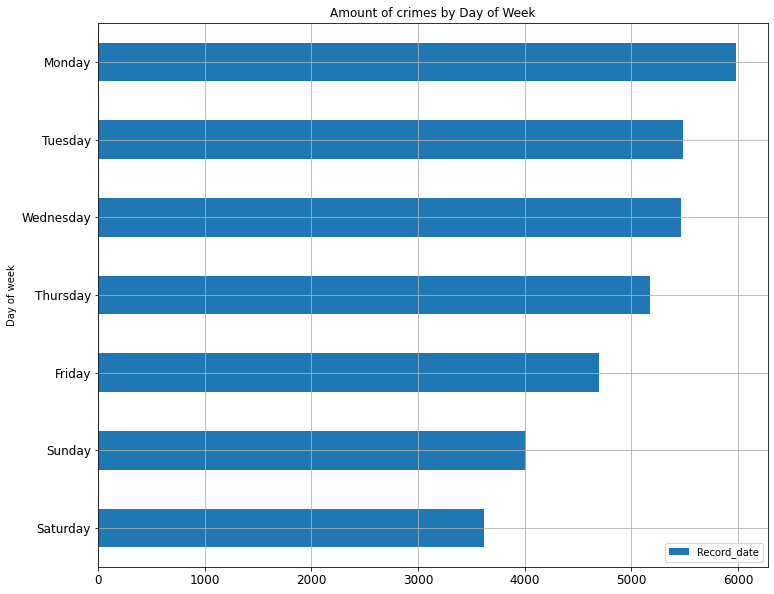

In [11]:
df_copy.groupby('Record_day')[['Record_date']].count()\
                .sort_values(by='Record_date', ascending=True)\
                .plot(kind='barh',
                figsize=(12,10),
                fontsize=12,
                title='Amount of crimes by Day of Week',
                xlabel='Day of week',
                grid=True);

#### Administrative district with most bike thiefs

In [12]:
df_copy.groupby('Administrative_district')[['Record_date']].count().sort_values(by=['Record_date'], ascending=False)

,Record_date
Administrative_district,
Pankow,5355
Mitte,4889
Friedrichshain-Kreuzberg,4795
Charlottenburg-Wilmersdorf,3715
Tempelhof-Schöneberg,2857
Treptow-Köpenick,2697
Neukölln,2684
Steglitz-Zehlendorf,2197
Lichtenberg,1925


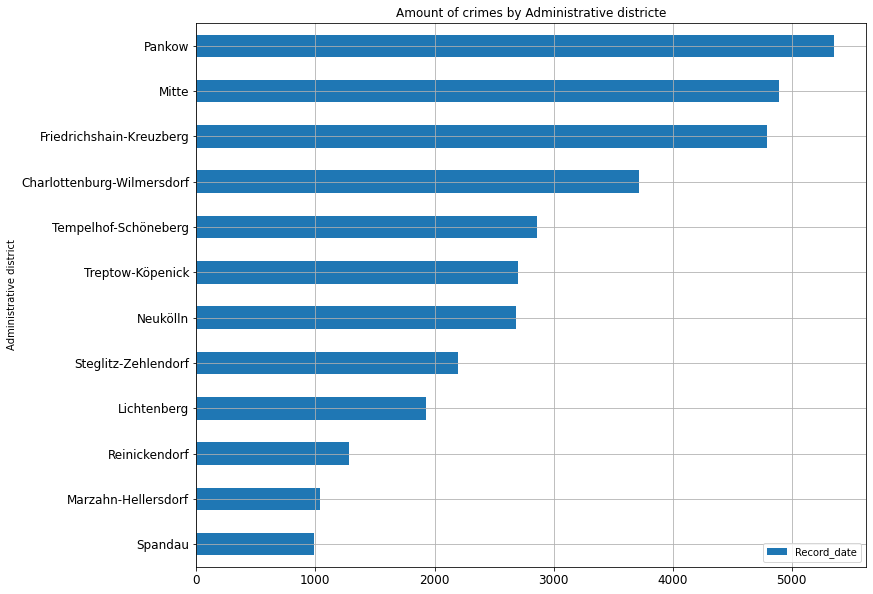

In [13]:
df_copy.groupby('Administrative_district')[['Record_date']].count()\
                                    .sort_values(by=['Record_date'], ascending=True)\
                                    .plot(kind='barh',
                                    figsize=(12,10),
                                    fontsize=12,
                                    title='Amount of crimes by Administrative districte',
                                    xlabel='Administrative district',
                                    grid=True);

#### Most stealing bike type

In [14]:
df_copy.groupby('Bike_type')[['Record_date']].count().sort_values(by='Record_date', ascending=False)

,Record_date
Bike_type,
Men,15879
Women,9977
Bike,5175
Mountain,1518
Child,1338
Racing,484
Cargo,53


In [15]:
df_copy.groupby('Crime_type')[['Record_date']].count().sort_values(by='Record_date', ascending=False)

,Record_date
Crime_type,
Theft,32955
Break-in,1469


#### Drop column *Record_date*

In [16]:
df_copy.drop(["Record_date"], axis=1, inplace=True)

In [17]:
df_copy

,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name
0,Monday,9,2022,2022-09-03,6,2022-09-04,11,6300526,790,No,Men,Theft,Aggravated theft,Steglitz-Zehlendorf,Zehlendorf Süd/Lichterfelde West,Teltower Damm,Zehlendorf Mitte
1,Monday,9,2022,2022-09-05,10,2022-09-05,10,9100101,1000,No,Mountain,Theft,Aggravated theft,Treptow-Köpenick,Treptow-Köpenick 1,Alt-Treptow,Alt-Treptow
2,Monday,9,2022,2022-09-05,11,2022-09-05,12,8100206,240,No,Men,Theft,Aggravated theft,Neukölln,Neukölln,Neuköllner Mitte/Zentrum,Flughafenstraße
3,Monday,9,2022,2022-09-05,8,2022-09-05,12,11400929,930,No,Men,Theft,Aggravated theft,Lichtenberg,Lichtenberg Mitte,Neu-Lichtenberg,Weitlingkiez
4,Monday,9,2022,2022-09-01,7,2022-09-02,14,9100101,300,No,Men,Theft,Aggravated theft,Treptow-Köpenick,Treptow-Köpenick 1,Alt-Treptow,Alt-Treptow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34419,Saturday,1,2021,2021-01-02,13,2021-01-02,13,8401243,1700,No,Men,Theft,Aggravated theft,Neukölln,Buckow Nord/Rudow,Rudow,Alt-Rudow
34420,Friday,1,2021,2021-01-01,20,2021-01-01,20,2100104,2800,No,Men,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Moritzplatz
34421,Friday,1,2021,2021-01-01,5,2021-01-01,8,10400941,2527,No,Bike,Break-in,Aggravated theft from basement/floor,Marzahn-Hellersdorf,Kaulsdorf/Mahlsdorf,Mahlsdorf,Pilgramer Straße
34422,Friday,1,2021,2021-01-01,17,2021-01-01,18,8401241,888,No,Bike,Theft,Theft,Neukölln,Buckow Nord/Rudow,Rudow,Blumenviertel


#### Change column type for datetime format 

In [18]:
df_copy['Stealing_date'] = pd.to_datetime(df['Stealing_date'])
df_copy['Report_stealing_date'] = pd.to_datetime(df['Report_stealing_date'])

#### Change all column type *object* to DataFrame *category* 

In [19]:
df_copy[[col for col in df_copy.columns if df_copy[col].dtypes == object]] = \
df_copy[[col for col in df_copy.columns if df_copy[col].dtypes == object]].astype('category')

In [20]:
df_copy

,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name
0,Monday,9,2022,2022-09-03,6,2022-09-04,11,6300526,790,No,Men,Theft,Aggravated theft,Steglitz-Zehlendorf,Zehlendorf Süd/Lichterfelde West,Teltower Damm,Zehlendorf Mitte
1,Monday,9,2022,2022-09-05,10,2022-09-05,10,9100101,1000,No,Mountain,Theft,Aggravated theft,Treptow-Köpenick,Treptow-Köpenick 1,Alt-Treptow,Alt-Treptow
2,Monday,9,2022,2022-09-05,11,2022-09-05,12,8100206,240,No,Men,Theft,Aggravated theft,Neukölln,Neukölln,Neuköllner Mitte/Zentrum,Flughafenstraße
3,Monday,9,2022,2022-09-05,8,2022-09-05,12,11400929,930,No,Men,Theft,Aggravated theft,Lichtenberg,Lichtenberg Mitte,Neu-Lichtenberg,Weitlingkiez
4,Monday,9,2022,2022-09-01,7,2022-09-02,14,9100101,300,No,Men,Theft,Aggravated theft,Treptow-Köpenick,Treptow-Köpenick 1,Alt-Treptow,Alt-Treptow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34419,Saturday,1,2021,2021-01-02,13,2021-01-02,13,8401243,1700,No,Men,Theft,Aggravated theft,Neukölln,Buckow Nord/Rudow,Rudow,Alt-Rudow
34420,Friday,1,2021,2021-01-01,20,2021-01-01,20,2100104,2800,No,Men,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Moritzplatz
34421,Friday,1,2021,2021-01-01,5,2021-01-01,8,10400941,2527,No,Bike,Break-in,Aggravated theft from basement/floor,Marzahn-Hellersdorf,Kaulsdorf/Mahlsdorf,Mahlsdorf,Pilgramer Straße
34422,Friday,1,2021,2021-01-01,17,2021-01-01,18,8401241,888,No,Bike,Theft,Theft,Neukölln,Buckow Nord/Rudow,Rudow,Blumenviertel


In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34424 entries, 0 to 34423
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Record_day               34424 non-null  category      
 1   Record_month             34424 non-null  int64         
 2   Record_year              34424 non-null  int64         
 3   Stealing_date            34424 non-null  datetime64[ns]
 4   Stealing_hour            34424 non-null  int64         
 5   Report_stealing_date     34424 non-null  datetime64[ns]
 6   Report_stealing_hour     34424 non-null  int64         
 7   Berlin_code_area         34424 non-null  int64         
 8   Bike_value               34424 non-null  int64         
 9   Unsuccesful_attempt      34424 non-null  category      
 10  Bike_type                34424 non-null  category      
 11  Crime_type               34424 non-null  category      
 12  Crime_reason             34424 n

## Machine Learning prediction modeling

In [22]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, StandardScaler, OneHotEncoder

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import statistics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import matthews_corrcoef, average_precision_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, roc_curve
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

#### Split data to 60% train and 40% test (the size of dataset is big almost 33 thousand)

In [24]:
X = df.drop(['Unsuccesful_attempt'], axis=1)
y = df['Unsuccesful_attempt']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40,
                                                   random_state = 42)

#### Transform y-variable by LabelEncoder for two classes (0 and 1)

Project assume crime prediction, but in dataset more than 99% are crime, and only 1% are no crime (*Unsucessfuly_attempt column*). Due to this fact, y-variable are reverse encoding. No crime treat as 0 (normal situation), crime treat as 1 (unnormal situation) 


- Crime unhappend *(Unsucessfuly attempt == Yes)* = label with number 0 
- Crime happend *(Unsucessfuly attempt == No)* = label with number 1 

In [26]:
le = preprocessing.LabelEncoder()

y_train = 1 - le.fit_transform(y_train)

y_test = 1 - le.transform(y_test)

In [27]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

#### Checking correct reverse coding for y_train data

In [28]:
unique, counts = np.unique(y_train, return_counts=True)

dict(zip(unique, counts))

{0: 62, 1: 20592}

### Preprocessing data for ML algoritm

#### Create pipline for all data transformation

##### Pipline steps:
- data transformation (*OneHotEncoding*, *StandardScaler*)

    *OneHotEncoding* for category data and column with datetime format
 
    *StandardScaler* for *Price* column


- data oversamoling (*SMOTE technique*)

    *SMOTE* (Synthetic minority oversampling technique) application for minority class. According to literature SMOTE is better then ordinar oversampling method, because algoritm create new data with information, contray to ordinar oversampling creat only new data by duplicated data without information component.


- algorithm applying (Naive Bayes, Logistic Regresion, Decison Tree Classifier, C-Support Vector Classifier, Gradient Boosting Classifier)

#### Oversampling method

Dataset is highly unbalanced:

    33 693 record are crime (Unsuccesful_attempt" == No, so crime happend) - label 1
    114 record are not crime (Unsuccesful_attempt" == Yes, so crime unhappend) - label 0

In [29]:
df_copy["Unsuccesful_attempt"].value_counts()

No     34308
Yes      116
Name: Unsuccesful_attempt, dtype: int64

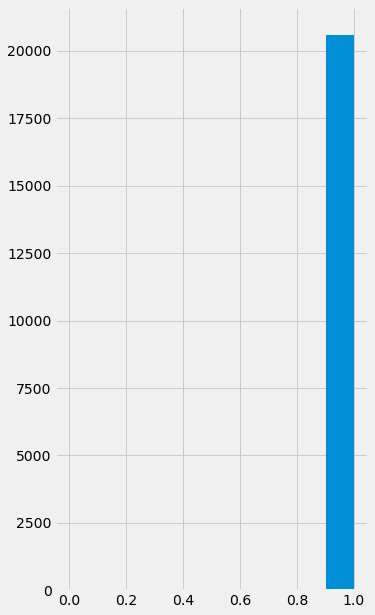

In [30]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(5, 10))
plt.hist(y_train)
plt.show()

### Pipline buliding

In [31]:
ohe_transform_col = ['Record_day','Record_month', 'Record_year', 'Stealing_date', 'Stealing_hour',
                     'Report_stealing_date', 'Report_stealing_hour', 'Berlin_code_area', 'Bike_type',
                     'Crime_type','Crime_reason','Administrative_district', 'District', 'Quarter', 'Street_name']

ohe_transformer = Pipeline(steps = [
    ('ohe_transform', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

sc_transform_col = ['Bike_value']

sc_transformer = Pipeline(steps = [
    ('sc_transform', StandardScaler())   
])


preprocessor = ColumnTransformer(transformers = [
    ('tnf1', ohe_transformer, ohe_transform_col),
    ('tnf2', sc_transformer, sc_transform_col),
])

#### Oversampling method

In [32]:
oversampling = SMOTE(sampling_strategy='minority', random_state=42)

#### Assembly all classifiers in one pipline

In [33]:
classifiers = [
    GaussianNB(),
    LogisticRegression(max_iter=500, random_state=42),
    DecisionTreeClassifier(random_state=42),
    SVC(random_state=42, probability=True),
    GradientBoostingClassifier(learning_rate=0.1, random_state=42)
]

In [34]:
Models_df = pd.DataFrame()
 
# przygotowujemy pipeline
pipe = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('oversampling', oversampling),
    ('classifier', None)
])

for model in classifiers:
    pipe_params = {
                'classifier': model
    }
    
    pipe.set_params(**pipe_params)
    
    start_time = time.time()
    pipe.fit(X_train, y_train)
    end_time = time.time()
 
    # sprawdzamy jak wyszło
    y_pred = pipe.predict_proba(X_test)
    
    score = roc_auc_score(y_test, y_pred[:,1])
 
    # zbieramy w dict parametry dla Pipeline i wyniki
    param_dict = {
        'model': model.__class__.__name__,
        'Test score': score,
        'Test time elapsed': end_time - start_time
    }
    
    Models_df = Models_df.append(pd.DataFrame(param_dict, index=[0]))
    
Models_df.reset_index(drop=True, inplace=True)

C:\Users\dell\AppData\Local\Temp/ipykernel_520/4247302942.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_df = Models_df.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_520/4247302942.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_df = Models_df.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_520/4247302942.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_df = Models_df.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_520/4247302942.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Mo

In [39]:
Models_df.sort_values('Test score', ascending=False)

,model,Test score,Test time elapsed
1,LogisticRegression,0.969746,10.350133
4,GradientBoostingClassifier,0.965036,794.508714
3,SVC,0.960588,470.470134
2,DecisionTreeClassifier,0.814013,13.792229
0,GaussianNB,0.499781,3.305510


#### *Score* boxplot for all models

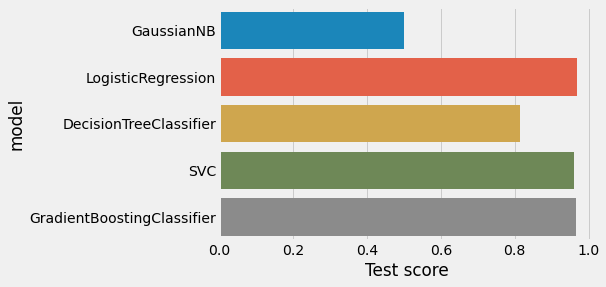

In [36]:
sns.barplot(data=Models_df, x='Test score', y='model');

#### *Time* boxplot for all models

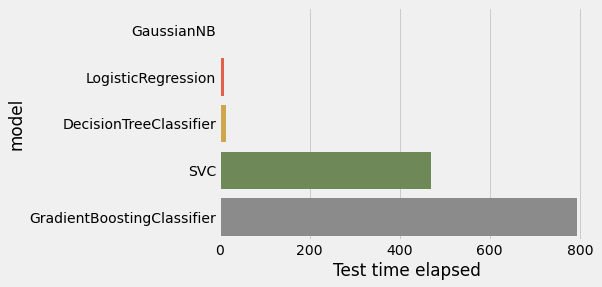

In [37]:
sns.barplot(data=Models_df, x='Test time elapsed', y='model');

#### Assembly all classifiers in one pipline only X_train and y_train part of data

In [38]:
Models_train_df = pd.DataFrame()
 
# przygotowujemy pipeline
pipe_train = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('oversampling', oversampling),
    ('classifier', None)
])

for model in classifiers:
    pipe_params = {
                'classifier': model
    }
    
    pipe_train.set_params(**pipe_params)
    
    start_time = time.time()
    pipe_train.fit(X_train, y_train)
    end_time = time.time()
 
    # sprawdzamy jak wyszło
    y_pred = pipe_train.predict_proba(X_train)
    
    score = roc_auc_score(y_train, y_pred[:,1])
 
    # zbieramy w dict parametry dla Pipeline i wyniki
    param_dict = {
        'model': model.__class__.__name__,
        'Train score': score,
        'Train time elapsed': end_time - start_time
    }
    
    Models_train_df = Models_train_df.append(pd.DataFrame(param_dict, index=[0]))
    
Models_train_df.reset_index(drop=True, inplace=True)

C:\Users\dell\AppData\Local\Temp/ipykernel_520/2663247579.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_train_df = Models_train_df.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_520/2663247579.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_train_df = Models_train_df.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_520/2663247579.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_train_df = Models_train_df.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_520/2663247579.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

In [40]:
Models_train_df.sort_values('Train score', ascending=False)

,model,Train score,Train time elapsed
2,DecisionTreeClassifier,1.000000,13.576159
3,SVC,1.000000,503.570569
4,GradientBoostingClassifier,1.000000,797.215017
1,LogisticRegression,0.999996,10.302660
0,GaussianNB,0.999976,3.372736


#### Join two DataFrame with each model results

In [41]:
Models_df_all = Models_df.join(Models_train_df.set_index('model'), how='left', on='model', )

#### Comparison each model base on prediction train and test data for investigate which model is underfitting/overfitting

In [42]:
Models_df_all

,model,Test score,Test time elapsed,Train score,Train time elapsed
0,GaussianNB,0.499781,3.305510,0.999976,3.372736
1,LogisticRegression,0.969746,10.350133,0.999996,10.302660
2,DecisionTreeClassifier,0.814013,13.792229,1.000000,13.576159
3,SVC,0.960588,470.470134,1.000000,503.570569
4,GradientBoostingClassifier,0.965036,794.508714,1.000000,797.215017
